# Naive Bayes Classifier

As part of this practical, we will use Naive Bayes to predict if a flight will have a significant delay. We will use a variety of information, including day of the week or the flight distance. The dataset will require some preprocessing, so you will also get further experience with data cleaning and feature engineering!

Let's import the packages that we will use during the practical:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Data processing and exploration

Outline of what we will do as part of data processing:
- load the dataset 
- remove the column `Month`
- in `CarrierDelay`, `WeatherDelay`, `NASDelay`, `SecurityDelay`, `LateAircraftDelay` columns replace NA by 0
- extract and remove the column `ArrDelay`
- define the vector `major_delay` as the delays above or equal to 26 minutes

### Loading the dataset

In [32]:
# load the dataset into a dataframe called data

data = pd.read_csv("data/flights08.csv")

### First look at the data
Have a look at the data:
    
- Do the features make sense?
- What's the shape of the dataset?
- How many missing values are present?
- How many unique values are present per feature? What does that tell you?

In [81]:
print(data.shape)
data.isna().sum()

(99999, 18)


Month                   0
DayofMonth              0
DayOfWeek               0
DepTime              1142
CRSDepTime              0
CRSArrTime              0
CRSElapsedTime          0
ArrDelay                0
DepDelay                0
Distance                0
TaxiOut              1142
Cancelled               0
Diverted                0
CarrierDelay            0
WeatherDelay            0
NASDelay                0
SecurityDelay           0
LateAircraftDelay       0
dtype: int64

In [34]:
data.describe()

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,CRSArrTime,CRSElapsedTime,ArrDelay,DepDelay,Distance,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,99999.0,99999.000000,99999.000000,98857.000000,99999.000000,99999.000000,99999.000000,98697.000000,98857.000000,99999.000000,98857.000000,99999.000000,99999.000000,19629.000000,19629.000000,19629.000000,19629.000000,19629.000000
mean,1.0,17.087741,3.890059,1355.194827,1341.983470,1502.593996,111.989240,5.729901,10.379123,630.583966,10.927461,0.011420,0.001600,9.573488,2.036120,8.353151,0.110805,29.343675
std,0.0,8.356321,1.953000,464.088277,451.355345,478.096654,57.209342,30.967112,28.384562,437.358628,5.988846,0.106254,0.039968,21.836836,13.815868,18.826087,1.724888,39.753529
min,1.0,1.000000,1.000000,1.000000,600.000000,5.000000,17.000000,-57.000000,-44.000000,66.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.0,10.000000,2.000000,942.000000,940.000000,1120.000000,70.000000,-9.000000,-2.000000,324.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,1.0,17.000000,4.000000,1344.000000,1335.000000,1520.000000,90.000000,-2.000000,1.000000,453.000000,9.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,18.000000
75%,1.0,24.000000,5.000000,1743.000000,1730.000000,1910.000000,145.000000,10.000000,10.000000,843.000000,12.000000,0.000000,0.000000,11.000000,0.000000,10.000000,0.000000,37.000000
max,1.0,31.000000,7.000000,2359.000000,2235.000000,2355.000000,370.000000,500.000000,516.000000,2363.000000,150.000000,1.000000,1.000000,431.000000,267.000000,366.000000,88.000000,434.000000


In [35]:
data.nunique()

Month                   1
DayofMonth             31
DayOfWeek               7
DepTime              1154
CRSDepTime            213
CRSArrTime            402
CRSElapsedTime        157
ArrDelay              390
DepDelay              353
Distance              445
TaxiOut               113
Cancelled               2
Diverted                2
CarrierDelay          209
WeatherDelay          169
NASDelay              191
SecurityDelay          38
LateAircraftDelay     287
dtype: int64

In [36]:
data.head()

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,CRSArrTime,CRSElapsedTime,ArrDelay,DepDelay,Distance,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,1,3,4,2003.0,1955,2225,150,-14.0,8.0,810,8.0,0,0,NaN,NaN,NaN,NaN,NaN
1,1,3,4,754.0,735,1000,145,2.0,19.0,810,10.0,0,0,NaN,NaN,NaN,NaN,NaN
2,1,3,4,628.0,620,750,90,14.0,8.0,515,17.0,0,0,NaN,NaN,NaN,NaN,NaN
3,1,3,4,926.0,930,1100,90,-6.0,-4.0,515,7.0,0,0,NaN,NaN,NaN,NaN,NaN
4,1,3,4,1829.0,1755,1925,90,34.0,34.0,515,10.0,0,0,2.0,0.0,0.0,0.0,32.0


### Dealing with missing values
The previous step should have shown you two things:
1. Some features have a lot of missing values, in particular those associated with delay at departure (e.g. ``CarrierDelay``). In the sequel, we will assume that a missing value for delay amounts to no delay.
2. Some features don't have enough unique values to be interesting (which ones?) and should probably removed. 

Based on this:
- fill the missing values associated with delay by a 0
- remove the feature(s) that don't have enough variability
- remove all instances that have missing values left

In [37]:
data.columns

Index(['Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'CRSArrTime', 'CRSElapsedTime', 'ArrDelay', 'DepDelay', 'Distance',
       'TaxiOut', 'Cancelled', 'Diverted', 'CarrierDelay', 'WeatherDelay',
       'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

In [38]:
delay = ['ArrDelay', 'DepDelay','CarrierDelay', 'WeatherDelay',
       'NASDelay', 'SecurityDelay', 'LateAircraftDelay']

In [39]:
# Fill missing values associated with delay
data[delay] = data[delay].fillna(0)

In [40]:
data.isna().sum()

Month                   0
DayofMonth              0
DayOfWeek               0
DepTime              1142
CRSDepTime              0
CRSArrTime              0
CRSElapsedTime          0
ArrDelay                0
DepDelay                0
Distance                0
TaxiOut              1142
Cancelled               0
Diverted                0
CarrierDelay            0
WeatherDelay            0
NASDelay                0
SecurityDelay           0
LateAircraftDelay       0
dtype: int64

In [41]:
data_2 = data.drop(['Month','DepTime','TaxiOut'] , axis=1)

In [43]:
data_2.head()

,DayofMonth,DayOfWeek,CRSDepTime,CRSArrTime,CRSElapsedTime,ArrDelay,DepDelay,Distance,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,3,4,1955,2225,150,-14.0,8.0,810,0,0,0.0,0.0,0.0,0.0,0.0
1,3,4,735,1000,145,2.0,19.0,810,0,0,0.0,0.0,0.0,0.0,0.0
2,3,4,620,750,90,14.0,8.0,515,0,0,0.0,0.0,0.0,0.0,0.0
3,3,4,930,1100,90,-6.0,-4.0,515,0,0,0.0,0.0,0.0,0.0,0.0
4,3,4,1755,1925,90,34.0,34.0,515,0,0,2.0,0.0,0.0,0.0,32.0


### Extracting the response
Our aim is to predict whether there will be a significant delay. The variable that encodes the delay is `ArrDelay`.

1. Start by having a look at ``ArrDelay`` using ``distplot`` from ``seaborn`` .
2. Compute the delay threshold such that 70% of the positive delays are lower than that threshold. The method `np.percentile` might be useful here.
3. Form a response vector `major_delay` being either 0 or 1 depending on whether the delay is less than or greater or equal to the threshold.
4. Finally remove the `ArrDelay` column from the dataset.

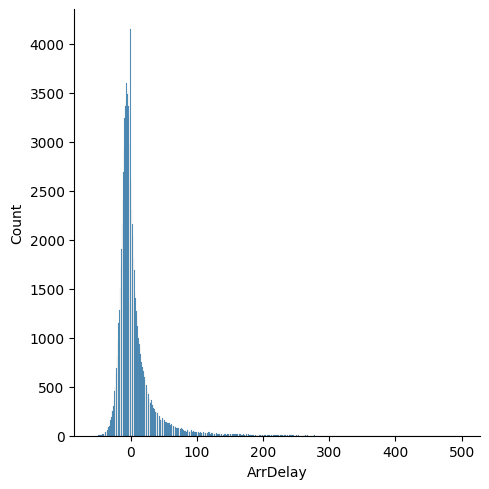

In [46]:
sns.displot(data_2['ArrDelay'])

Have a look at the value of the delay threshold:

In [57]:
# np.percentile(data_2['ArrDelay'], 70)
delays = [x for x in data_2['ArrDelay'] if x >= 0]

major_delay = np.percentile(delays, 70)

In [61]:
data_2['MajorDelay'] = [1 if x >= major_delay else 0 for x in data_2['ArrDelay']]

In [64]:
data_3 = data_2.drop('ArrDelay', axis=1)

## Fit and evaluate a Naive Bayes model

### Train-test split
Split the data into training and testing sets, using a random state of ``5175`` for comparable results. Use 30% of the data for testing and stratify the training and testing sets using ``major_delay`` vector to have a similar proportion of flights with major delay in both of them.

In [84]:
X = data_3.drop('MajorDelay', axis=1)
y = data_3['MajorDelay']

In [88]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5175, stratify=y)

### Fit a basic Gaussian Naive Bayes model
Create and fit a Gaussian Naive Bayes model to the training data:

In [90]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

### Make predictions and display the classification report
Make predictions on the test data and have a look at the classification report:

In [91]:
from sklearn.metrics import classification_report, accuracy_score, f1_score

accuray = accuracy_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test, average="weighted")

print('Accuracy: ', accuray)
print('F1: ', f1)

Accuracy:  0.9514333333333334
F1:  0.9485869805200431


### Look at the probabilities
Gaussian Naive Bayes gives probabilities indicating how confident the model is about the classification. Use `distplot` from `seaborn` to display the modelled probabilities for class 1 (major delays). Use `predict_proba`, not `score`, but you may also want to try `predict_log_proba`. Comment on the resulting graph.

In [92]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97     25750
           1       0.74      1.00      0.85      4250

    accuracy                           0.95     30000
   macro avg       0.87      0.97      0.91     30000
weighted avg       0.96      0.95      0.95     30000



/Users/matteomazzeri/anaconda3/envs/myenv/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  This is separate from the ipykernel package so we can avoid doing imports until


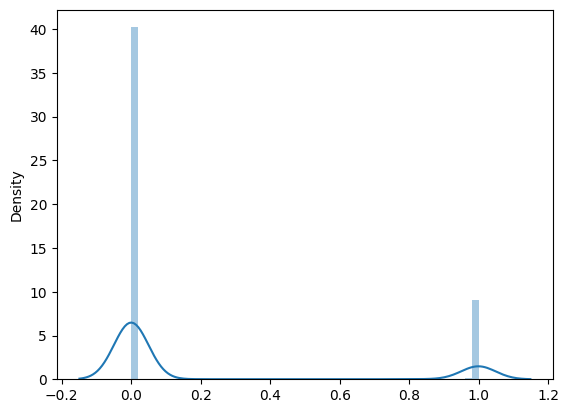

In [98]:
proba = gnb.predict_proba(X_test)

sns.distplot(proba[:,1])
plt.show()